In [252]:
import os
import pathlib
from dataclasses import dataclass

import matplotlib as mpl
import matplotlib.axes._axes as axes
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
from PIL import Image

# Única imagem | Sole image

In [253]:
pathlib.Path.cwd()

WindowsPath('e:/Repositories/alcd/activities')

In [254]:
parent_path = pathlib.Path("..")

In [255]:
res_path = pathlib.Path("resources/a_1_sole.jpg")
res_path = parent_path.joinpath(res_path)
sole_img = Image.open(res_path)
sole_img = np.asarray(sole_img)
sole_img_gray = sole_img.mean(axis=2)

In [256]:
sole_img_gray.shape

(1684, 1500)

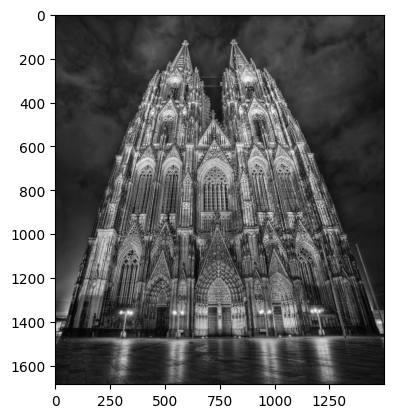

In [257]:
plt.imshow(sole_img_gray, cmap="gray")

In [258]:
limit_exp = int(np.floor(np.log2(min(sole_img_gray.shape)))) + 1
r_factors = [2 ** i for i in range(limit_exp)]
print("Fatores a serem testados:", r_factors)

Fatores a serem testados: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [259]:
@dataclass(frozen=True)
class TruncationResult:
    img_raw: npt.NDArray
    error_mse: np.float64
    error_mape: np.float64
    error_mae: np.float64

In [260]:
U, S, Vh = np.linalg.svd(sole_img_gray, full_matrices=False)

res = dict[int, TruncationResult]()
for r in r_factors:
    img_raw = (U[:, :r] * S[:r]) @ Vh[:r, :]
    diff = img_raw - sole_img_gray
    mse = np.mean(np.power(diff, 2))
    mae = np.mean(np.abs(diff))
    mape = np.mean(np.abs(diff) / sole_img_gray)
    t_res = TruncationResult(img_raw, mse, mape, mae)
    res[r] = t_res

In [261]:
# Save all
result_path = parent_path.joinpath(pathlib.Path("results/at_1"))
sole_path = result_path.joinpath("sole")
os.makedirs(sole_path, exist_ok=True)

for k, v in res.items():
    reconstructed = res[k].img_raw
    rounded_uint8 = np.array(np.floor(reconstructed), dtype=np.uint8)
    img = Image.fromarray(rounded_uint8).convert("RGB")
    img.save(sole_path.joinpath(f"r={k}.jpg"))

In [262]:
r_sorted = list(res.items())
r_sorted.sort()
idx = [r[0] for r in r_sorted]
mse_arr = [r[1].error_mse for r in r_sorted]
mape_arr = [r[1].error_mape for r in r_sorted]
mae_arr = [r[1].error_mae for r in r_sorted]
df = pd.DataFrame(
    index=idx,
    columns=["error_mse", "error_mape", "error_mae"],
    data=np.array([mse_arr, mape_arr, mae_arr]).T
)
df.to_csv(sole_path.joinpath("stats.csv"))

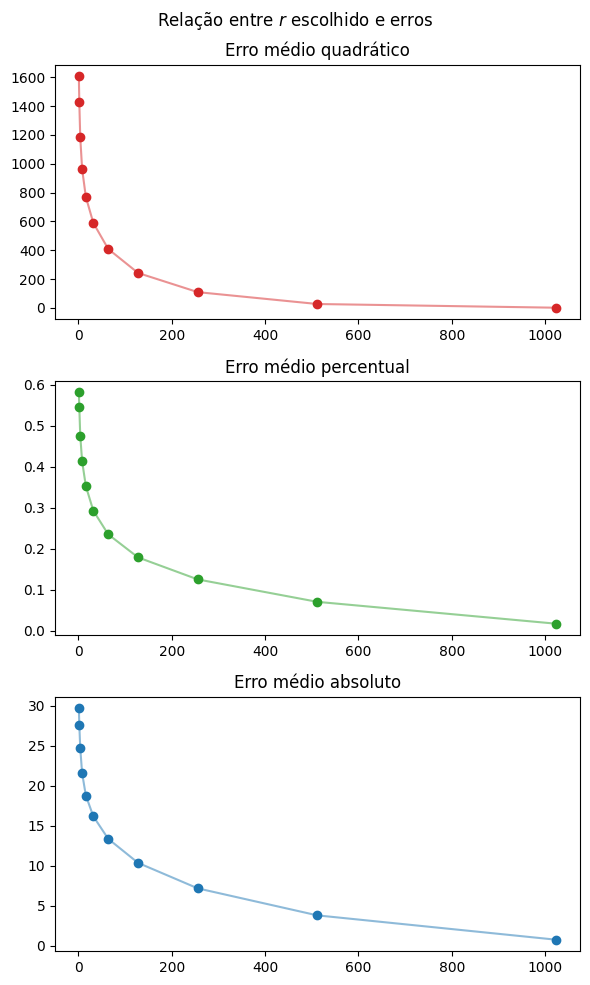

In [263]:
fig, axs = plt.subplots(3, 1, figsize=(6, 10))
ax0: axes.Axes = axs[0]
ax1: axes.Axes = axs[1]
ax2: axes.Axes = axs[2]
cmap = plt.get_cmap("PiYG", 3)

ax0.scatter(idx, mse_arr, color="tab:red")
ax1.scatter(idx, mape_arr, color="tab:green")
ax2.scatter(idx, mae_arr, color="tab:blue")
ax0.plot(idx, mse_arr, color="tab:red", alpha=0.5)
ax1.plot(idx, mape_arr, color="tab:green", alpha=0.5)
ax2.plot(idx, mae_arr, color="tab:blue", alpha=0.5)
fig.suptitle("Relação entre $r$ escolhido e erros")
ax0.set_title("Erro médio quadrático")
ax1.set_title("Erro médio percentual")
ax2.set_title("Erro médio absoluto")
fig.tight_layout()
fig.savefig(sole_path.joinpath("errors.png"), dpi=300)

# Montagem | Montage

In [264]:
res_path = pathlib.Path("resources/a_1_montage.jpg")
res_path = parent_path.joinpath(res_path)
montage_img = Image.open(res_path)
montage_img = np.asarray(montage_img)
montage_img_gray = montage_img.mean(axis=2)

In [265]:
montage_img_gray.shape

(710, 810)

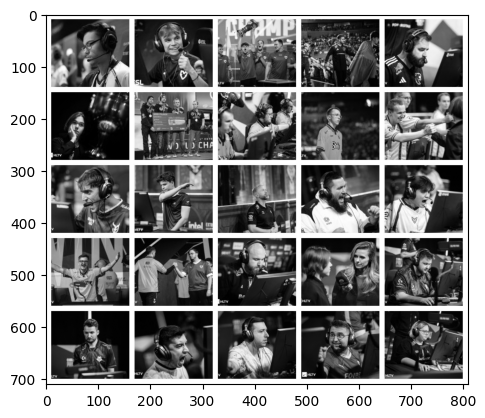

In [266]:
plt.imshow(montage_img_gray, cmap="gray")

In [267]:
limit_exp = int(np.floor(np.log2(min(sole_img_gray.shape)))) + 1
r_factors = [2 ** i for i in range(limit_exp)]
print("Fatores a serem testados:", r_factors)

Fatores a serem testados: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


In [268]:
U, S, Vh = np.linalg.svd(montage_img_gray, full_matrices=False)

res = dict[int, TruncationResult]()
for r in r_factors:
    img_raw = (U[:, :r] * S[:r]) @ Vh[:r, :]
    diff = img_raw - montage_img_gray
    mse = np.mean(np.power(diff, 2))
    mae = np.mean(np.abs(diff))
    t_res = TruncationResult(img_raw, mse, mape, mae)
    res[r] = t_res

In [269]:
# Save all
result_path = parent_path.joinpath(pathlib.Path("results/at_1"))
montage_path = result_path.joinpath("montage")
os.makedirs(montage_path, exist_ok=True)

for k, v in res.items():
    reconstructed = res[k].img_raw
    rounded_uint8 = np.array(np.floor(reconstructed), dtype=np.uint8)
    img = Image.fromarray(rounded_uint8).convert("RGB")
    img.save(montage_path.joinpath(f"r={k}.jpg"))

In [270]:
r_sorted = list(res.items())
r_sorted.sort()
idx = [r[0] for r in r_sorted]
mse_arr = [r[1].error_mse for r in r_sorted]
mae_arr = [r[1].error_mae for r in r_sorted]
df = pd.DataFrame(
    index=idx,
    columns=["error_mse", "error_mae"],
    data=np.array([mse_arr, mae_arr]).T
)
df.to_csv(montage_path.joinpath("stats.csv"))

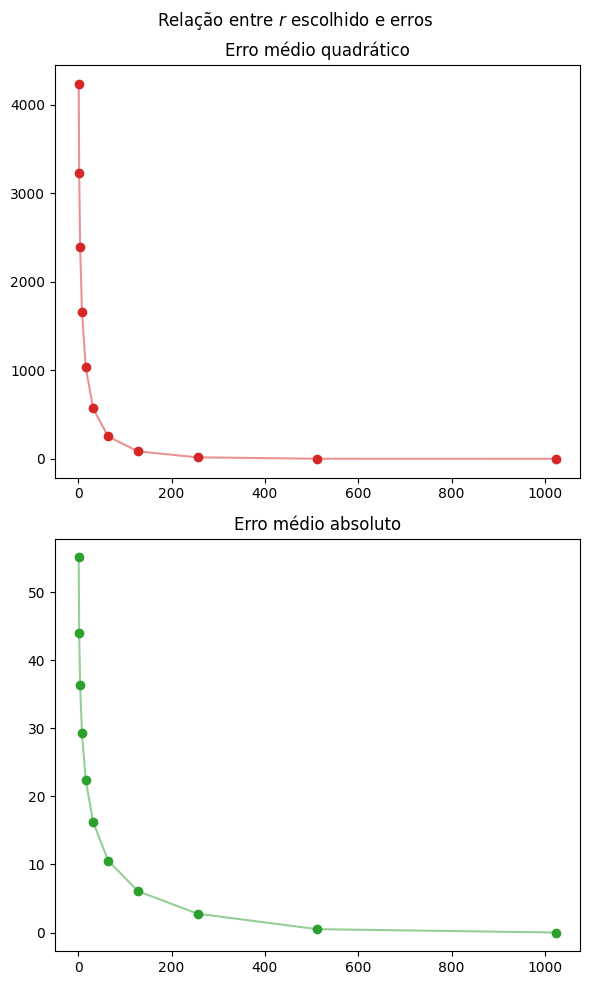

In [271]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))
ax0: axes.Axes = axs[0]
ax1: axes.Axes = axs[1]
cmap = plt.get_cmap("PiYG", 2)

ax0.scatter(idx, mse_arr, color="tab:red")
ax1.scatter(idx, mae_arr, color="tab:green")
ax0.plot(idx, mse_arr, color="tab:red", alpha=0.5)
ax1.plot(idx, mae_arr, color="tab:green", alpha=0.5)
fig.suptitle("Relação entre $r$ escolhido e erros")
ax0.set_title("Erro médio quadrático")
ax1.set_title("Erro médio absoluto")
fig.tight_layout()
fig.savefig(montage_path.joinpath("errors.png"), dpi=300)